<a href="https://colab.research.google.com/github/skhan66/Internship-DA/blob/main/WorldBankData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd

In [4]:
# load data
country = pd.read_csv("/content/drive/MyDrive/Internship resources/Metadata_Country.csv")
population = pd.read_csv("/content/drive/MyDrive/Internship resources/country_population.csv")
fertility_rate = pd.read_csv("/content/drive/MyDrive/Internship resources/fertility_rate.csv")
life_expectancy = pd.read_csv("/content/drive/MyDrive/Internship resources/life_expectancy.csv")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Cleaning Datasets

1. Cleaning Metadata Country dataset

In [75]:
country.head()


,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,SNA data for 2000-2011 are updated from offici...,Aruba
1,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,Not available,Angola
3,ALB,Europe & Central Asia,Upper middle income,Not available,Albania
4,AND,Europe & Central Asia,High income,WB-3 code changed from ADO to AND to align wit...,Andorra


In [ ]:
print(country.isnull().sum())
country['SpecialNotes'].fillna('Not available', inplace=True)


In [ ]:
country.isnull().sum()


In [ ]:
country['Region'].fillna(country['Region'].mode()[0], inplace=True)
country['IncomeGroup'].fillna(country['IncomeGroup'].mode()[0], inplace=True)
country['SpecialNotes'].fillna('Not Available', inplace=True)
country.head()

In [73]:
country['Region'].unique()


array(['Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa',
       'Europe & Central Asia', 'Middle East & North Africa',
       'East Asia & Pacific', 'North America'], dtype=object)

In [74]:
correlation_matrix = country.corr(numeric_only=True)


2. Cleaning Country Population data set

In [ ]:
print(population.info())


In [ ]:
print(population.isnull().sum())


In [16]:
population.fillna(population.mean(), inplace=True)


<ipython-input-16-77b74fffaca3>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  population.fillna(population.mean(), inplace=True)


In [ ]:
print(population.head())


3. Cleaning Fertility rate Dataset

In [ ]:
fertility_rate.head()

In [ ]:
fertility_rate.describe()


In [ ]:
print(fertility_rate.isnull().sum())


In [24]:
fertility_rate.fillna(fertility_rate.mean(numeric_only=True), inplace=True)


In [ ]:
fertility_rate.duplicated().sum()


In [ ]:
fertility_rate.nunique()


4. Cleaning Life expectency dataset

In [ ]:
life_expectancy.head()

In [ ]:
print(life_expectancy.isnull().sum())


In [33]:
numeric_columns = life_expectancy.select_dtypes(include=[np.number]).columns
life_expectancy[numeric_columns] = life_expectancy[numeric_columns].apply(pd.to_numeric, errors='coerce')


In [ ]:
life_expectancy.head()

In [45]:
life_expectancy.fillna(life_expectancy.mean(numeric_only=True), inplace=True)


In [ ]:
life_expectancy.head()

**Graph Plotting**

In [51]:

df.columns

Index(['Country Code', 'Region', 'IncomeGroup', 'SpecialNotes', 'TableName'], dtype='object')

In [52]:
life_expectancy.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016'],
      dtype='object')

In [53]:
population.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016'],
      dtype='object')

In [54]:
fertility_rate.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016'],
      dtype='object')

1. Line Graph- Years v/s Population

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

selected_country = 'ARB'

# Extract the relevant data for the selected country
selected_population = population[population['Country Code'] == selected_country]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(selected_population.columns[4:], selected_population.iloc[0, 4:], marker='o', label=selected_country)
plt.title('Population Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()


2. Fertility Rate Distribution

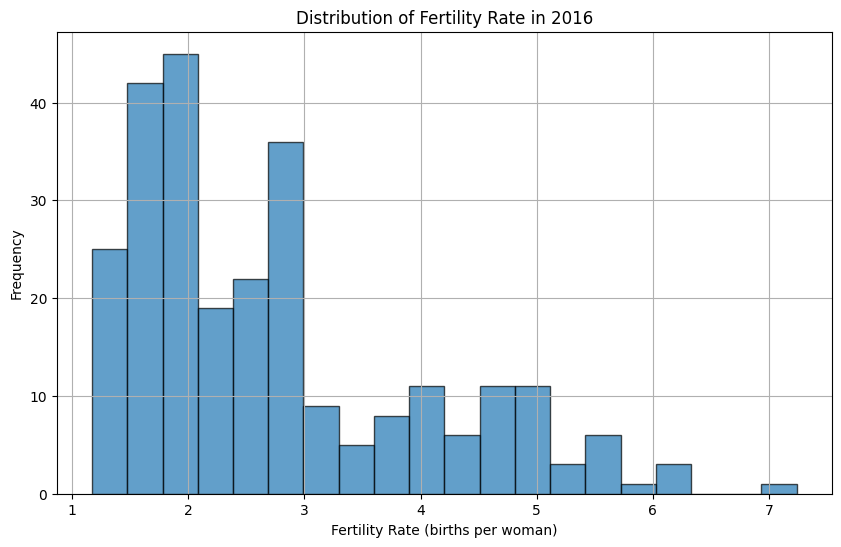

In [56]:
import pandas as pd
import matplotlib.pyplot as plt


selected_year = '2016'

fertility_rate_year = fertility_rate[['Country Name', 'Country Code', selected_year]]

# Drop NaN values for the selected year
fertility_rate_year = fertility_rate_year.dropna(subset=[selected_year])

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(fertility_rate_year[selected_year], bins=20, edgecolor='black', alpha=0.7)
plt.title(f'Distribution of Fertility Rate in {selected_year}')
plt.xlabel('Fertility Rate (births per woman)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


3. Life expectancy variation


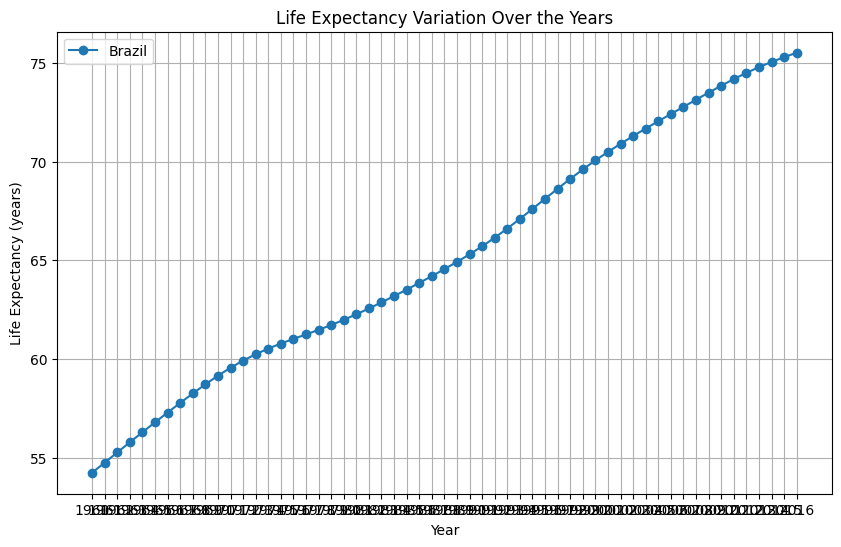

In [58]:
import pandas as pd
import matplotlib.pyplot as plt


selected_country = 'Brazil'

selected_life_expectancy = life_expectancy[life_expectancy['Country Name'] == selected_country]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(selected_life_expectancy.columns[4:], selected_life_expectancy.iloc[0, 4:], marker='o', label=selected_country)
plt.title('Life Expectancy Variation Over the Years')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (years)')
plt.legend()
plt.grid(True)
plt.show()


4. Correlation Analysis

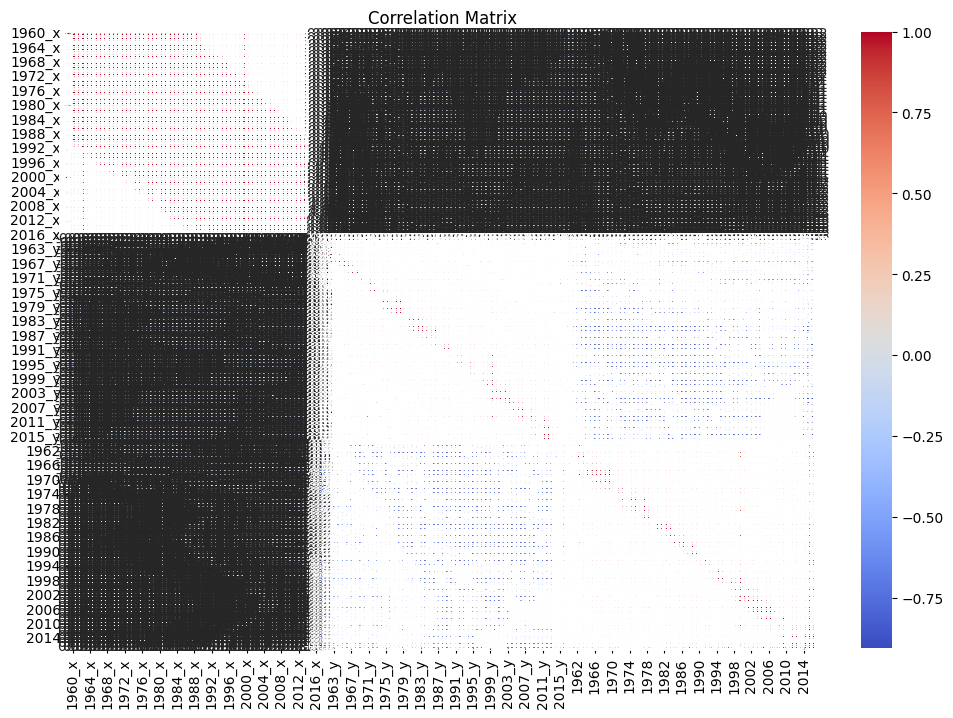

In [61]:
import seaborn as sns
import pandas as pd
# Merge the datasets on the common columns (Country Code and Country Name)
merged_data = pd.merge(population, fertility_rate, on=['Country Code', 'Country Name'])
merged_data = pd.merge(merged_data, life_expectancy, on=['Country Code', 'Country Name'])

# Select the numeric columns for correlation analysis
numeric_columns = merged_data.select_dtypes(include=[np.number]).columns

# Calculate the correlation matrix
correlation_matrix = merged_data[numeric_columns].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


5. Regional Analysis

In [78]:
region_groups = df.groupby('Region')


In [79]:
region_means = region_groups.mean()


<ipython-input-79-3b17075070e5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region_means = region_groups.mean()


['Aruba' 'Afghanistan' 'Angola' 'Albania' 'Andorra' 'Arab World'
 'United Arab Emirates' 'Argentina' 'Armenia' 'American Samoa'
 'Antigua and Barbuda' 'Australia' 'Austria' 'Azerbaijan' 'Burundi'
 'Belgium' 'Benin' 'Burkina Faso' 'Bangladesh' 'Bulgaria' 'Bahrain'
 'Bahamas, The' 'Bosnia and Herzegovina' 'Belarus' 'Belize' 'Bermuda'
 'Bolivia' 'Brazil' 'Barbados' 'Brunei Darussalam' 'Bhutan' 'Botswana'
 'Central African Republic' 'Canada' 'Central Europe and the Baltics'
 'Switzerland' 'Channel Islands' 'Chile' 'China' "Cote d'Ivoire"
 'Cameroon' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Colombia' 'Comoros'
 'Cabo Verde' 'Costa Rica' 'Caribbean small states' 'Cuba' 'Curacao'
 'Cayman Islands' 'Cyprus' 'Czech Republic' 'Germany' 'Djibouti'
 'Dominica' 'Denmark' 'Dominican Republic' 'Algeria'
 'East Asia & Pacific (excluding high income)'
 'Early-demographic dividend' 'East Asia & Pacific'
 'Europe & Central Asia (excluding high income)' 'Europe & Central Asia'
 'Ecuador' 'Egypt, Arab Rep.' 'Euro

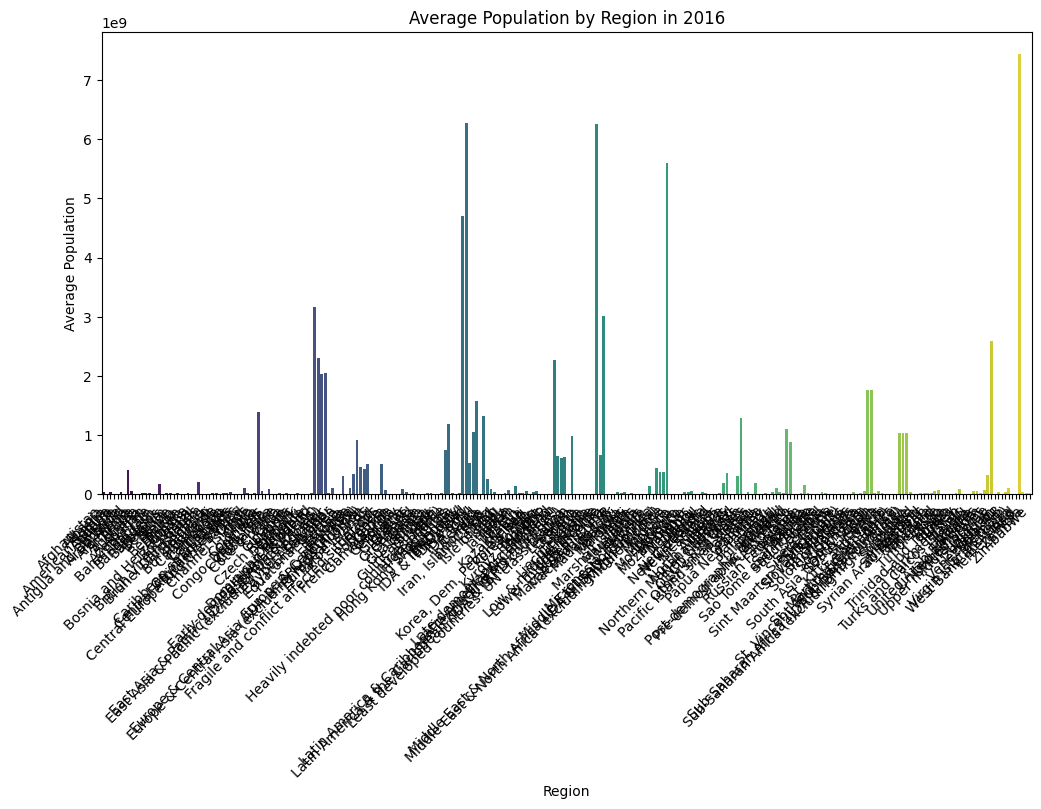

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print(population['Country Name'].unique())

region_population_avg = population.groupby('Country Name')['2016'].mean().reset_index()

# Plotting a bar chart for average population by region
plt.figure(figsize=(12, 6))
sns.barplot(x='Country Name', y='2016', data=region_population_avg, palette='viridis')
plt.title('Average Population by Region in 2016')
plt.xlabel('Region')
plt.ylabel('Average Population')
plt.xticks(rotation=45, ha='right')
plt.show()
